In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('D://DSML PRACTICAL//Datasets//Lipstick.csv')

In [2]:
df

,Id,Age,Income,Gender,Ms,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [3]:
x=['Age','Income','Gender','Ms']
y='Buys'

In [4]:
gindict=dict()


In [5]:
def calc_entropy(yes,no,tc):
    return 1-((yes/tc)**2+(no/tc)**2)

In [6]:
sum=0
total=len(df)
for abc in x:
    sum=0
    unique_values=df[abc].unique()
    for gh in unique_values:
        total_counts=len(df[df[abc]==gh])
        yes_count=len(df[(df[abc]==gh) & (df['Buys']=='Yes')])
        no_count=len(df[(df[abc]==gh) & (df['Buys']=='No')])
        sum+=(total_counts/total)*calc_entropy(yes_count,no_count,total_counts)
    gindict[abc]=sum
    
    

In [7]:
print(gindict)

{'Age': 0.34285714285714286, 'Income': 0.44047619047619047, 'Gender': 0.3673469387755103, 'Ms': 0.44897959183673475}


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le= LabelEncoder()

In [10]:
encoders={}

In [11]:
for abc in df.columns:
    le=LabelEncoder()
    df[abc]=le.fit_transform(df[abc])
    encoders[abc]=le

In [12]:
df

,Id,Age,Income,Gender,Ms,Buys
0,0,1,0,1,1,0
1,1,1,0,1,0,0
2,2,0,0,1,1,1
3,3,2,2,1,1,1
4,4,2,1,0,1,1
5,5,2,1,0,0,0
6,6,0,1,0,0,1
7,7,1,2,1,1,0
8,8,1,1,0,0,1
9,9,2,2,0,1,1


In [13]:
from sklearn.tree import DecisionTreeRegressor,plot_tree,DecisionTreeClassifier
# from sklearn.preprocessing import train_test_split

In [14]:
dt=DecisionTreeClassifier()

In [15]:
dt

DecisionTreeClassifier()

In [16]:
a=df[['Age','Income','Gender','Ms']]
b=df['Buys']

In [17]:
dt.fit(a,b)

DecisionTreeClassifier()

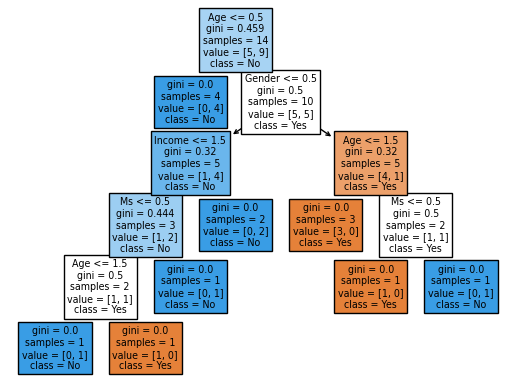

['Yes']


In [18]:
columns = df.columns.to_list()
plot_tree(dt, feature_names=['Age','Income','Gender','Ms'], 
          class_names=['Yes', 'No'], filled=True)
plt.show()

input_data = {
    'Age': ['>35'],
    'Income': ['Medium'],
    'Gender': ['Female'],
    'Ms': ['Married']
}
input_data = pd.DataFrame(input_data)
for column in x:
    le = encoders[column]
    input_data[column] = le.transform(input_data[column])
abc=dt.predict(input_data)
abc = abc.astype(int) 
print(encoders['Buys'].inverse_transform(abc))
